Logistic Regression


Credit Card Fraud Detection - The dataset is taken from kaggle.com,
which consists anonymized or encoded features that have been derived from the original data for privacy or security reasons.

In [462]:
#importing the necessary dependencies & libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,recall_score
from sklearn.preprocessing import StandardScaler


Task 1: Analysing Data

In [463]:
#loading the dataset
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [464]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [465]:
num_classes = pd.Series(data['Class']).value_counts().sort_index()
print(num_classes)



Class
0    284315
1       492
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

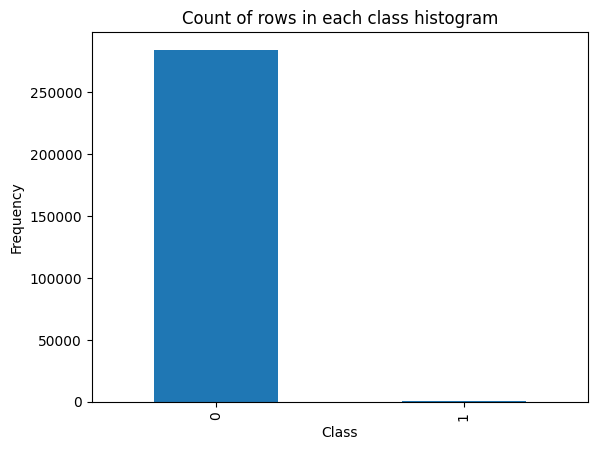

In [466]:
#plotting the occurances of each class
num_classes.plot(kind = 'bar')
plt.title('Count of rows in each class histogram')
plt.xlabel("Class")
plt.ylabel("Frequency")

Task 2: Feature Scaling

From the above chart, it is observed that dataset is clearly imbalanced(skewed data).
Since the dataset is very large, to obtain a balance, I have implemented one of the re sampling techniques called under-sampling (randomly selected a subset of training examples from dataset with class=0(not fraud) and eliminated it)

In [467]:
#Feature Scaling the Amount column in the dataset
SS= StandardScaler()
data['Amount']=SS.fit_transform(data[['Amount']])
data = data.drop(['Time'],axis=1)
data.head(5)



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In XY dataset, X (V1, V2..) Y(Class=0,1)
For 40 in Y class=1 there will be 40 from X which have Y class=0
Other 40 in X with Y class =1 are both mixed as X_undersample and its corresponding Y is Y_undersampling

In [468]:
#splitting X and y (without Under-sampling)
y=data['Class']
X=data.drop(['Class'],axis=1)
#number of fraud examples
fraud_num = len(data[data.Class==1])
fraud_data= np.array(data[data.Class==1].index) #the data rows with class==1

In [469]:
#the data rows with class==0
normal_data=data[data.Class==0].index
#randomly taking the subset of normal_data(not fraud)  
random_normal_data= np.array(np.random.choice(normal_data,fraud_num, replace= False))

In [470]:
#combing both fraud and subset of not fraud data as a newdata
new_data=np.concatenate([fraud_data,random_normal_data])
undersampling_data = data.iloc[new_data,:]

Here, it is seen that both the class have the equal number of data rows which makes it a balanced data set

In [471]:
#printing the number of examples in each class after unser-sampling
print(undersampling_data.shape)
Count_of_distinct_classes = pd.Series(undersampling_data['Class']).value_counts().sort_index()
print(Count_of_distinct_classes)


(984, 30)
Class
0    492
1    492
Name: count, dtype: int64


In [472]:
# splitting the undersampling data 
y_under=undersampling_data['Class']
X_under=undersampling_data.drop(['Class'],axis=1)

In [473]:
#splitting the data into train and test set using test_train_split
#data set before Undersampling
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
#undersampling dataset
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)


Task 3: Logistic Regression
Since the data is skewed, numerous instances might be erroneously classified as False Negatives. In other words, we might predict a transaction as normal when it's actually fraudulent. Recall, in this context, quantifies our ability to capture such occurrences.(TP/TP+FN)

In [474]:
# Function for choosing the best regularization value
def best_reg_val(train_x, train_y):
    fold = KFold(n_splits=10, shuffle=False)

    # Different parameters values
    lambda_val = [0.01, 0.1, 1, 10, 100]

    res = pd.DataFrame(index=range(len(lambda_val)), columns=['lambda Value', 'Mean recall score'])
    res['lambda Value'] = lambda_val

    # Iterate over different lambda values
    j = 0
    for i in lambda_val:
        print('-------------------------------------------')
        print('Lambda parameter: ', i)
        print('-------------------------------------------')
        print('')

        recall_val = []
        for iteration, indices in enumerate(fold.split(train_x), start=1):
            # Call the logistic regression model with a certain C(lambda) parameter
            lr = LogisticRegression(C=i, penalty='l1', solver='liblinear')

            # Use the training data to fit the model
            train_index, test_index = indices
            lr.fit(train_x.iloc[train_index], train_y.iloc[train_index].values.ravel())

            # Predict values using the test data
            pred = lr.predict(train_x.iloc[test_index])

            # Calculate the recall score
            recall = recall_score(train_y.iloc[test_index], pred)
            recall_val.append(recall)
            print('Iteration ', iteration, ': recall score = ', recall)

        # Calculate and store the mean recall score
        res.loc[j, 'Mean recall score'] = np.mean(recall_val)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_val))
        print('')

    # Get the best lambda value
    best_lambda = res.loc[res['Mean recall score'].idxmax()]['lambda Value']

    # Print the best lambda value
    print('***************************')
    print('Best model to choose from cross validation is with lambda parameter = ', best_lambda)
    print('***************************')

    return best_lambda

In [475]:
best_lambda = best_reg_val(X_train_under,y_train_under)

-------------------------------------------
Lambda parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.9743589743589743
Iteration  2 : recall score =  0.8823529411764706
Iteration  3 : recall score =  0.9487179487179487
Iteration  4 : recall score =  0.8529411764705882
Iteration  5 : recall score =  1.0
Iteration  6 : recall score =  1.0
Iteration  7 : recall score =  1.0
Iteration  8 : recall score =  0.9285714285714286
Iteration  9 : recall score =  0.9459459459459459
Iteration  10 : recall score =  1.0

Mean recall score  0.9532888415241356

-------------------------------------------
Lambda parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8974358974358975
Iteration  2 : recall score =  0.7941176470588235
Iteration  3 : recall score =  0.8974358974358975
Iteration  4 : recall score =  0.8529411764705882
Iteration  5 : recall score =  0.9642857142857143
Iteration  6 : recall score =  0.93548387096

In [476]:
#Implementation of Logistic Regression using the best lambda got from the above function
model = LogisticRegression(C=best_lambda, penalty='l1',solver='liblinear')
model.fit(X_train_under, y_train_under.values.ravel())
pred_under= model.predict(X_test_under.values)

#confusion matrix
cm = confusion_matrix(y_test_under, pred_under)
print(cm)
print("Recall metric in the testing dataset: ", cm[1,1]/(cm[1,0]+cm[1,1]))

[[129  20]
 [  8 139]]
Recall metric in the testing dataset:  0.9455782312925171


/Users/sharlenegandham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Task 4: Confusion Matrix

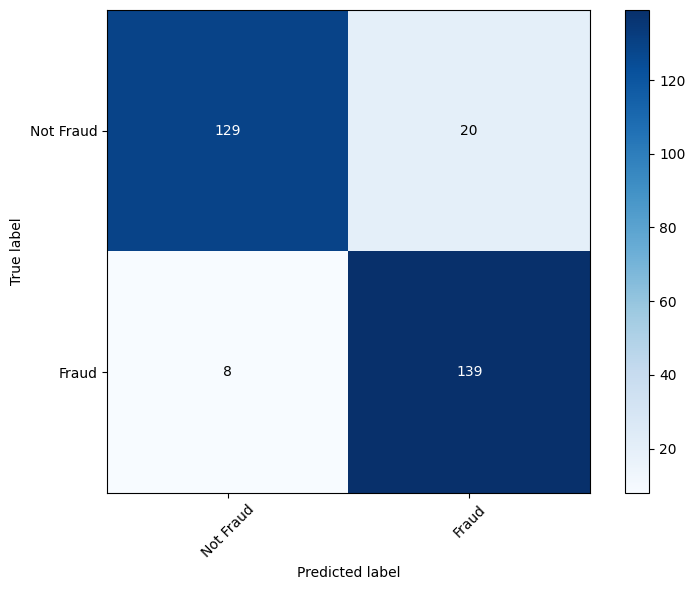

In [482]:
# Plot confusion matrix
def plot_cm(actual, predicted, normalize=False, title='Confusion Matrix'):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    plt.colorbar()
    classes = ['Not Fraud', 'Fraud']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_cm(y_test_under, pred_under)

task 5: Performing Logistic regression classifier for Undersampled data and try to test it on whole test data

Recall metric in the testing dataset:  0.9387755102040817


/Users/sharlenegandham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sharlenegandham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


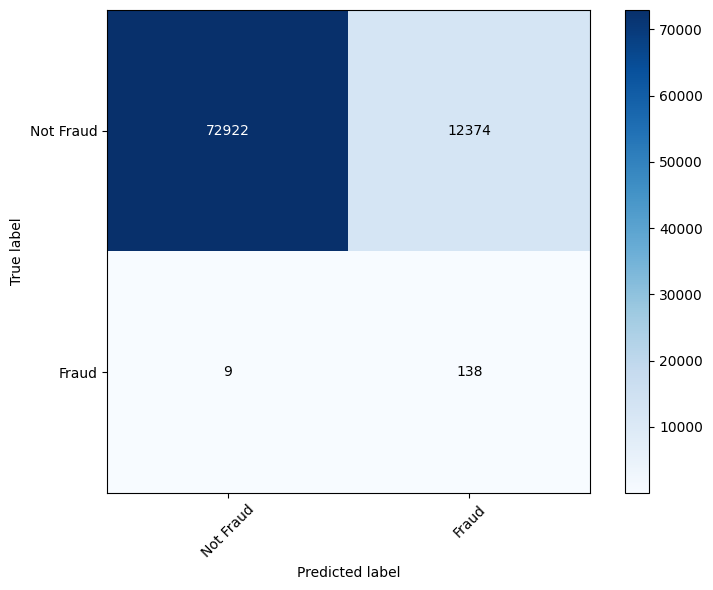

In [480]:
#Implementation of Logistic Regression using the best lambda got from the above function
#training only on test on whole dataset
model1 = LogisticRegression(C=best_lambda, penalty='l1',solver='liblinear')
model1.fit(X_train_under, y_train_under.values.ravel())
pred_test_whole= model1.predict(X_test.values)
cm=confusion_matrix(y_test, pred_test_whole)
pred_under= model.predict(X_test_under.values)
print("Recall metric in the testing dataset: ", cm[1,1]/(cm[1,0]+cm[1,1]))
#confusion matrix
plot_cm(y_test, pred_test_whole)


Task 6: Performing Logsitic Regression classifier on the whole dataset (skewed data)


In [490]:
best_lambda_val_whole = best_reg_val(X_train, y_train)

-------------------------------------------
Lambda parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.5
Iteration  2 : recall score =  0.4838709677419355
Iteration  3 : recall score =  0.5555555555555556
Iteration  4 : recall score =  0.6216216216216216
Iteration  5 : recall score =  0.6206896551724138
Iteration  6 : recall score =  0.7419354838709677
Iteration  7 : recall score =  0.6153846153846154
Iteration  8 : recall score =  0.5
Iteration  9 : recall score =  0.4444444444444444
Iteration  10 : recall score =  0.5142857142857142

Mean recall score  0.5597788058077269

-------------------------------------------
Lambda parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.5555555555555556
Iteration  2 : recall score =  0.5483870967741935
Iteration  3 : recall score =  0.6111111111111112
Iteration  4 : recall score =  0.6216216216216216
Iteration  5 : recall score =  0.6551724137931034
Iteration  6 :

Recall metric in the testing dataset:  0.6190476190476191


/Users/sharlenegandham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sharlenegandham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


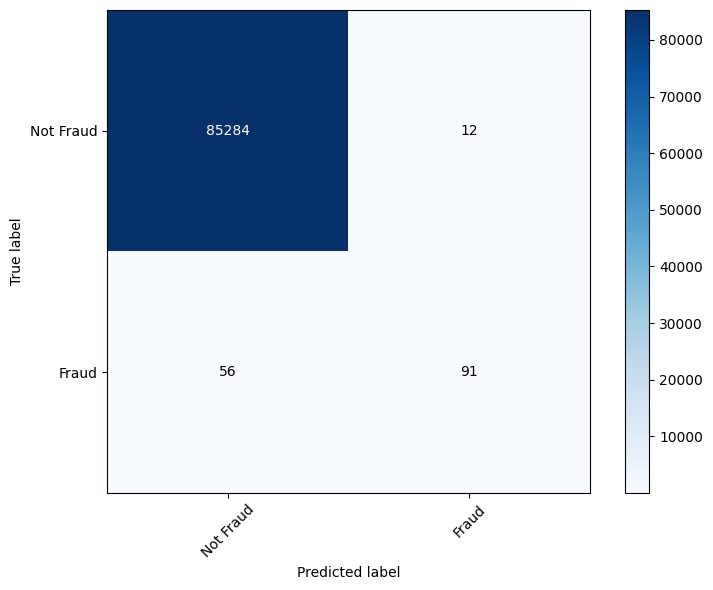

In [493]:
#Implementation of Logistic Regression using the best lambda got from the above function
#training only on test on whole dataset
model2 = LogisticRegression(C=best_lambda_val_whole, penalty='l1',solver='liblinear')
model2.fit(X_train, y_train.values.ravel())
pred_whole= model2.predict(X_test.values)
cm=confusion_matrix(y_test, pred_whole)
pred_under= model.predict(X_test_under.values)
print("Recall metric in the testing dataset: ", cm[1,1]/(cm[1,0]+cm[1,1]))
#confusion matrix
plot_cm(y_test, pred_whole)